In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data_mlx.csv')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


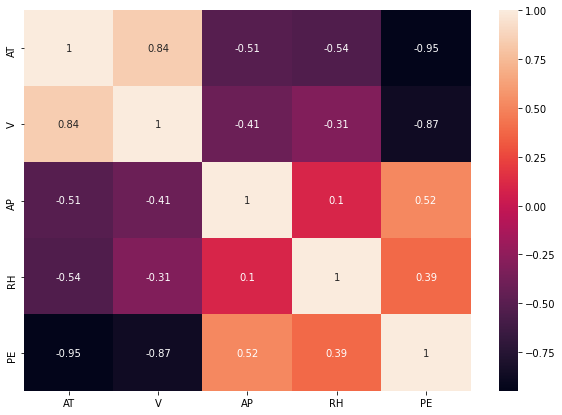

In [7]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True)

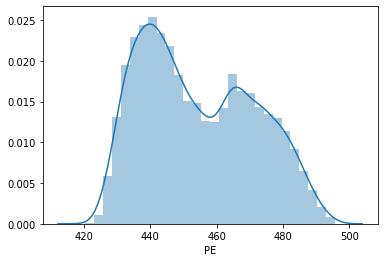

In [9]:
sns.distplot(data['PE'])

In [10]:
target = data['PE']
features = data.drop(['PE'], axis=1)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, train_size=0.70)

In [16]:
rf = RandomForestRegressor(n_estimators=5, max_depth=7)

In [17]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=7, n_estimators=5)

In [22]:
Y_pred = rf.predict(X_test)
print(Y_pred)

[445.06648855 472.17282513 442.11928781 ... 434.20666367 444.11949895
 484.969699  ]


In [23]:
print(np.array(Y_test))

[446.86 471.23 440.66 ... 436.17 444.22 486.8 ]


In [27]:
metrics.r2_score(Y_test, Y_pred)

0.9429301642153102

# Automated Feature Selection using SBS

In [24]:
sbs = SFS(rf, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='r2', 
          cv=3, 
          n_jobs=-1)

In [25]:
sbs = sbs.fit(X_train, Y_train)

In [26]:
print('\nSequential Backward Selection (k=3):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)


Sequential Backward Selection (k=3):
(0, 1, 3)
CV Score:
0.9432310158161007


In [30]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.9464335699052244, 0.9506934776656912, 0.944...",0.947094,"(AT, V, AP, RH)",0.00609898,0.00271026,0.00191644
3,"(0, 1, 3)","[0.9433147276639404, 0.9465122834608056, 0.939...",0.943231,"(AT, V, RH)",0.00610731,0.00271396,0.00191906
